In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Descarga del dataset

In [2]:
covid_df = pd.read_csv(r"C:/Users/Marco Gamez/Actividad 3.3 HDSP/worldwide-aggregate.csv")

In [3]:
covid_df.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1433,42,42,52.284803
4,2020-01-26,2118,56,56,47.801814


## Confirmar tamaño del dataset

In [34]:
print('***COVID-19 Worldwide Aggregate Data***\n')
print('El dataset contiente {0} filas/observaciones y {1} columnas/atributos'.format(covid_df.shape[0], covid_df.shape[1]))

***COVID-19 Worldwide Aggregate Data***

El dataset contiente 418 filas/observaciones y 5 columnas/atributos


## Revisión de atributos

In [36]:
print('***Atributos***')
covid_df.columns

***Atributos***


Index(['Date', 'Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')

## Obtención de medidas estadísticas fundamentales

In [43]:
features = ['Confirmed', 'Recovered', 'Deaths']

for i in features:
    print('Media de \033[1m{0}\033[0m : {1:,.2f}, personas'.format(i, covid_df.loc[:,i].mean()))
    print('Mediandad de \033[1m{0}\033[0m : {1:,.2f}, personas'.format(i,covid_df.loc[:,i].median()))
    print('Desviación estándar de \033[1m{0}\033[0m : {1:,.2f}, personas \n'.format(i, covid_df.loc[:,i].std()))
    

Media de Confirmed : 36,477,445.55, personas
Mediandad de Confirmed : 22,027,979.00, personas
Desviación estándar de Confirmed : 38,142,269.83, personas 

Media de Recovered : 21,519,464.26, personas
Mediandad de Recovered : 14,003,389.50, personas
Desviación estándar de Recovered : 21,864,235.29, personas 

Media de Deaths : 933,073.90, personas
Mediandad de Deaths : 777,965.00, personas
Desviación estándar de Deaths : 793,097.98, personas 



## Tendencias de los datos

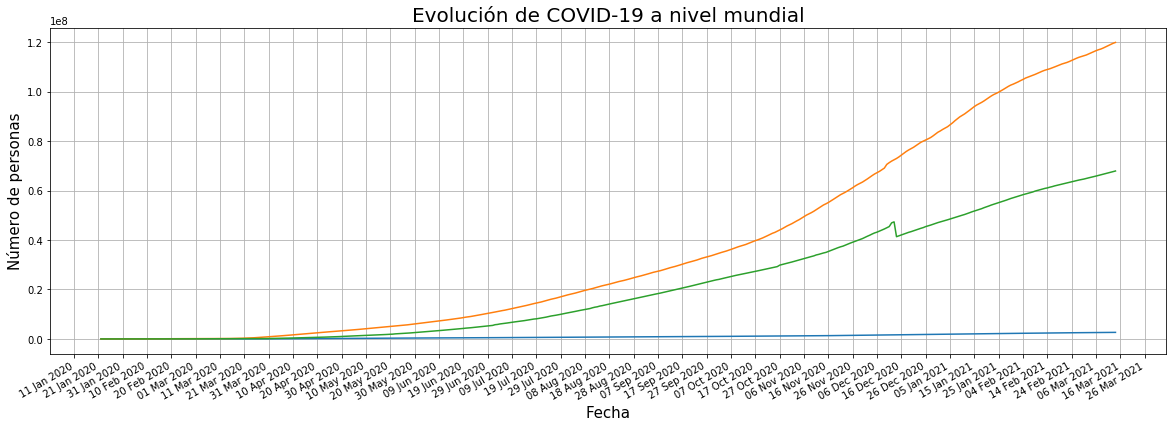

In [92]:
figure, ax = plt.subplots(figsize = (20,6))
plt.plot(covid_df.Date, covid_df.Deaths)
plt.plot(covid_df.Date, covid_df.Confirmed)
plt.plot(covid_df.Date, covid_df.Recovered)
plt.title('Evolución de COVID-19 a nivel mundial', Fontsize = 20)
plt.xlabel('Fecha', Fontsize = 15)
plt.ylabel('Número de personas', Fontsize = 15)

ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=10)) # -> import matplotlib.dates as mdates
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d %b %Y")) # -> da formato a las fechas en eje x
plt.setp(ax.get_xticklabels(), rotation = 30, ha="right") # -> rota el eje x a 30 grados a la derecha

plt.grid() # -> coloca fondo cuadriculado
plt.show()


In [117]:
countries_df = pd.read_csv(r"C:/Users/Marco Gamez/Actividad 3.3 HDSP/countries-aggregated.csv")

In [118]:
countries_df.tail()

,Date,Country,Confirmed,Recovered,Deaths
80251,2021-03-10,Zimbabwe,36341,33953,1489
80252,2021-03-11,Zimbabwe,36377,33972,1492
80253,2021-03-12,Zimbabwe,36423,33996,1496
80254,2021-03-13,Zimbabwe,36471,34011,1501
80255,2021-03-14,Zimbabwe,36484,34043,1503


In [125]:
mex = countries_df.loc[countries_df['Country'] == 'Mexico']
us =  countries_df.loc[countries_df['Country'] == 'US']
brazil = countries_df.loc[countries_df['Country'] == 'Brazil']
francia = countries_df.loc[countries_df['Country'] == 'France']
italia = countries_df.loc[countries_df['Country'] == 'Italy']

In [25]:
mex.tail(20)
print(mex.shape)
print(us.shape)
print(brazil.shape)

(418, 5)
(418, 5)
(418, 5)
11483370


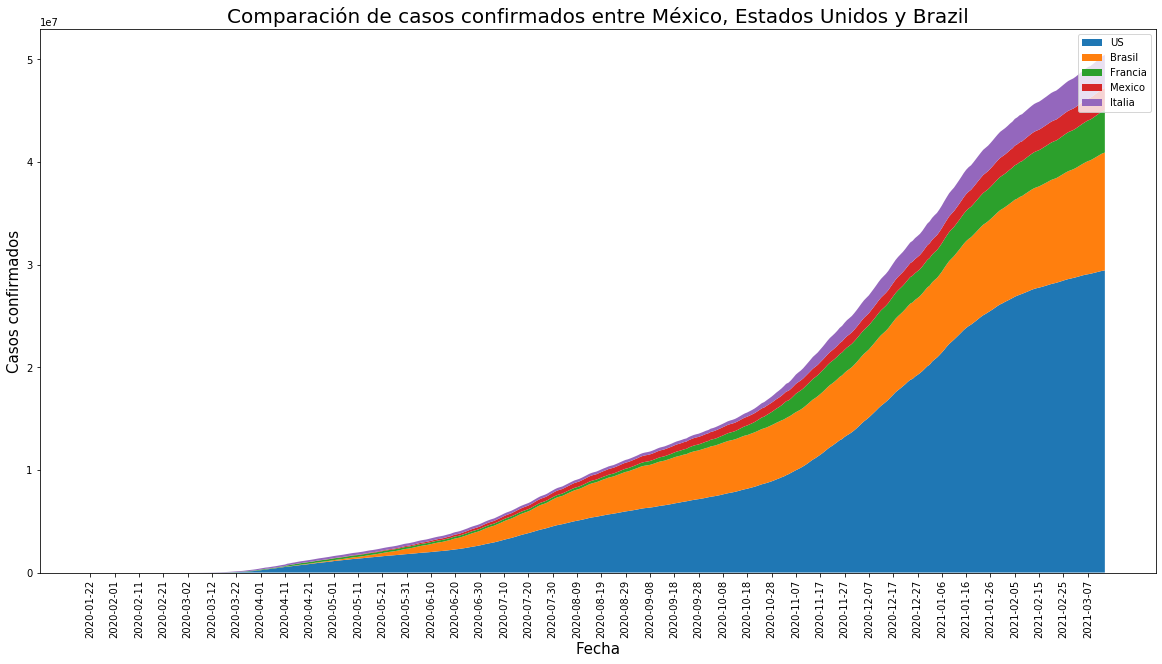

In [126]:
figure, ax = plt.subplots(figsize = (20,10))
plt.stackplot(mex['Date'], us['Confirmed'], brazil['Confirmed'], francia['Confirmed'], mex['Confirmed'], italia['Confirmed']
              , labels = ['US', 'Brasil', 'Francia', 'Mexico', 'Italia'])

plt.xticks(mex['Date'][::10],  rotation='vertical')

plt.title('Comparación de casos confirmados entre México, Estados Unidos y Brazil', Fontsize = 20)
plt.xlabel('Fecha', Fontsize = 15)
plt.ylabel('Casos confirmados', Fontsize = 15)
plt.legend()
plt.show()

## Visualización de mapa mundial COVID-19 (geometry - Points)

In [115]:
df = pd.read_csv(r"C:/Users/Marco Gamez/Actividad 3.3 HDSP/03-13-2021.csv")
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-14 05:25:37,33.93911,67.709953,55959,2454,49471.0,4034.0,Afghanistan,143.748741,4.385354
1,NaN,NaN,NaN,Albania,2021-03-14 05:25:37,41.15330,20.168300,116821,2030,79821.0,34970.0,Albania,4059.385642,1.737701
2,NaN,NaN,NaN,Algeria,2021-03-14 05:25:37,28.03390,1.659600,115143,3034,79783.0,32326.0,Algeria,262.577563,2.634984
3,NaN,NaN,NaN,Andorra,2021-03-14 05:25:37,42.50630,1.521800,11228,112,10775.0,341.0,Andorra,14531.806122,0.997506
4,NaN,NaN,NaN,Angola,2021-03-14 05:25:37,-11.20270,17.873900,21323,520,19848.0,955.0,Angola,64.878069,2.438681


In [116]:
geometry = [Point(xy) for xy in zip (df['Long_'], df['Lat'])]
geometry[:3]

In [118]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,geometry
0,NaN,NaN,NaN,Afghanistan,2021-03-14 05:25:37,33.93911,67.709953,55959,2454,49471.0,4034.0,Afghanistan,143.748741,4.385354,POINT (67.70995 33.93911)
1,NaN,NaN,NaN,Albania,2021-03-14 05:25:37,41.15330,20.168300,116821,2030,79821.0,34970.0,Albania,4059.385642,1.737701,POINT (20.16830 41.15330)
2,NaN,NaN,NaN,Algeria,2021-03-14 05:25:37,28.03390,1.659600,115143,3034,79783.0,32326.0,Algeria,262.577563,2.634984,POINT (1.65960 28.03390)
3,NaN,NaN,NaN,Andorra,2021-03-14 05:25:37,42.50630,1.521800,11228,112,10775.0,341.0,Andorra,14531.806122,0.997506,POINT (1.52180 42.50630)
4,NaN,NaN,NaN,Angola,2021-03-14 05:25:37,-11.20270,17.873900,21323,520,19848.0,955.0,Angola,64.878069,2.438681,POINT (17.87390 -11.20270)


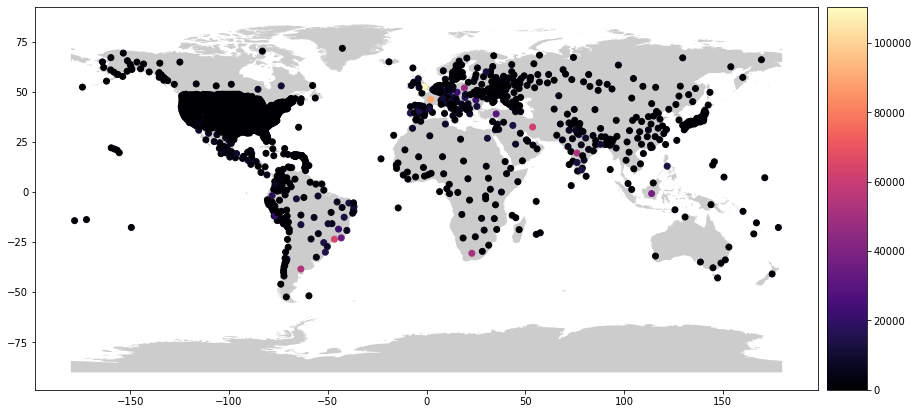

In [170]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

geo_df.plot(ax = ax, column = 'Deaths', figsize = (15,15), cmap = "magma", legend = True, cax = cax)

## Visualización Mudial (geometry - Polygon)

In [134]:
world_df = pd.read_csv(r"C:/Users/Marco Gamez/Actividad 3.3 HDSP/countries-aggregated.csv")
world_df = world_df.loc[world_df['Date'] == '2021-03-14']
crs = {'init' : 'epsg:4326'}
world_df.head()

,Date,Country,Confirmed,Recovered,Deaths
417,2021-03-14,Afghanistan,55985,49477,2457
835,2021-03-14,Albania,117474,80483,2045
1253,2021-03-14,Algeria,115265,79887,3036
1671,2021-03-14,Andorra,11266,10796,113
2089,2021-03-14,Angola,21380,19850,521


In [135]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

#

longitude = []
latitude = []

def findGeocode(city):
     # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="Actividad 3.3 HDSP") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    

for i in (world_df["Country"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 
    

In [153]:
world_df['Longitude'] = longitude
world_df['Latitude'] = latitude

world_df.head()

,Date,name,Confirmed,Recovered,Deaths,Longitude,Latitude
417,2021-03-14,Afghanistan,55985,49477,2457,66.238514,33.768006
835,2021-03-14,Albania,117474,80483,2045,19.999962,41.000028
1253,2021-03-14,Algeria,115265,79887,3036,0.605539,28.142011
1671,2021-03-14,Andorra,11266,10796,113,1.573203,42.540717
2089,2021-03-14,Angola,21380,19850,521,17.569124,-11.877577


In [146]:
#Carga de mapa y eliminación de Antartica usando GeoPandas
import geopandas
world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_map = world_map[(world_map.pop_est>0) & (world_map.name!="Antarctica")]
world_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


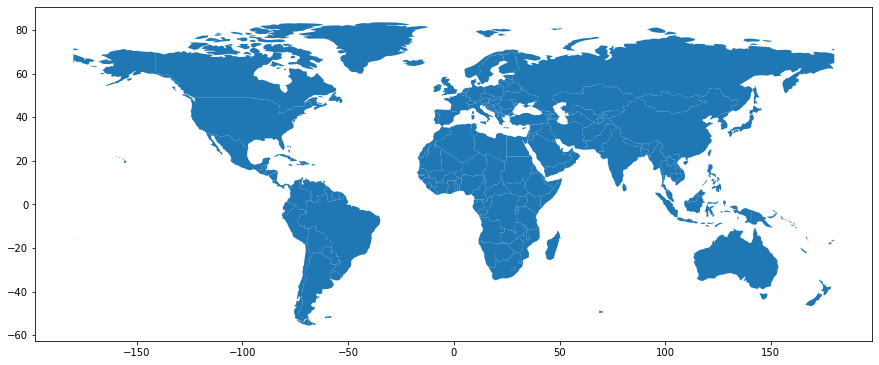

In [149]:
world_map.plot(figsize = (15,15))

In [172]:
#Comparación de DataFrames Pandas-Geopandas (Nombre de los países)

for items in world_df['name'].tolist(): # 'name' o 'Country'
    world_map_name = world_map['name'].tolist()
    if items in world_map_name:
        pass
    else:
        print(items + ' no está en world_map_name')

Andorra no está en world_map_name
Antigua and Barbuda no está en world_map_name
Bahrain no está en world_map_name
Barbados no está en world_map_name
Burma no está en world_map_name
Cabo Verde no está en world_map_name
Comoros no está en world_map_name
Cote d'Ivoire no está en world_map_name
Diamond Princess no está en world_map_name
Dominica no está en world_map_name
Equatorial Guinea no está en world_map_name
Eswatini no está en world_map_name
Grenada no está en world_map_name
Holy See no está en world_map_name
Liechtenstein no está en world_map_name
MS Zaandam no está en world_map_name
Maldives no está en world_map_name
Malta no está en world_map_name
Marshall Islands no está en world_map_name
Mauritius no está en world_map_name
Micronesia no está en world_map_name
Monaco no está en world_map_name
North Macedonia no está en world_map_name
Saint Kitts and Nevis no está en world_map_name
Saint Lucia no está en world_map_name
Saint Vincent and the Grenadines no está en world_map_name
Sa

In [171]:
# Cambio de nombres de países para unificar bases de datos

world_df.replace('US', 'United States of America', inplace = True)
world_df.replace('Dominican Republic', 'Dominican Rep.', inplace = True)
world_df.replace('Korea, South', 'South Korea', inplace = True)
world_df.replace('Solomon Islands', 'Solomon Is.', inplace = True)
world_df.replace('Taiwan*', 'Taiwan', inplace = True)
world_df.replace('South Sudan', 'S. Sudan', inplace = True)
world_df.replace('Bosnia and Herzegovina', 'Bosnia and Herz.', inplace = True)
world_df.replace('Central African Republic', 'Central African Rep.', inplace = True)
world_df.replace('Congo (Kinshasa)', 'Dem. Rep. Congo', inplace = True)
world_df.replace('Congo (Brazzaville)', 'Congo', inplace = True)

In [167]:
# Cambio de nombre de la columna 'Country' a 'name'
world_df.rename(columns = {'Country': 'name'}, inplace = True)
world_df.head()


,Date,name,Confirmed,Recovered,Deaths,Longitude,Latitude
417,2021-03-14,Afghanistan,55985,49477,2457,66.238514,33.768006
835,2021-03-14,Albania,117474,80483,2045,19.999962,41.000028
1253,2021-03-14,Algeria,115265,79887,3036,0.605539,28.142011
1671,2021-03-14,Andorra,11266,10796,113,1.573203,42.540717
2089,2021-03-14,Angola,21380,19850,521,17.569124,-11.877577


In [173]:
# Unión de DataFrames world_df(pandas) - world_map(geopandas)

combined = world_map.merge(world_df, on = 'name')
#combined.drop(columns = ['Date', 'geometry_y', 'pop_est', 'Longitude', 'Latitude'])
combined.rename(columns = {'geometry_x' : 'geometry'}, inplace = True)
combined.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Date,Confirmed,Recovered,Deaths,Longitude,Latitude
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2021-03-14,66,60,2,179.012274,-18.123970
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2021-03-14,509,183,21,35.787844,-6.524712
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2021-03-14,914595,860779,22455,-107.991707,61.066692
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2021-03-14,29438222,0,534880,-100.445882,39.783730
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2021-03-14,274541,251901,3195,65.209320,47.228609


In [174]:
# Conversión de DataFrame (pandas) a GeoDataFrame (geopandas)
combined_gpd = geopandas.GeoDataFrame(combined)

In [14]:
# Permite unir Latitud y Longitud para graficar puntos (geometry - Points)
# -------------> Brincar a la siguiente celda <---------------
world_gpd = geopandas.GeoDataFrame(world_df, geometry=geopandas.points_from_xy(world_df.Longitude, world_df.Latitude))

<function matplotlib.pyplot.show(*args, **kw)>

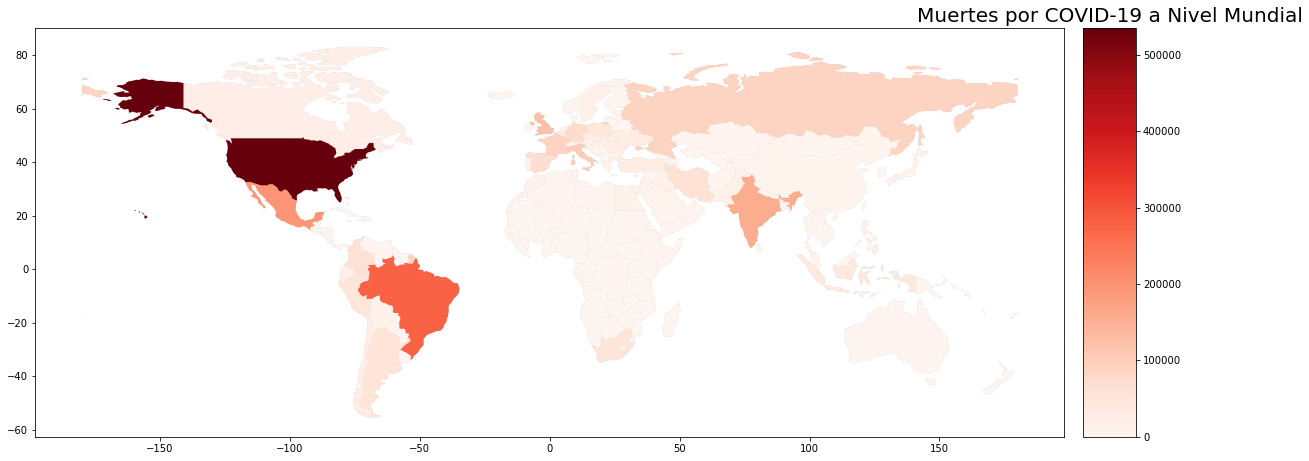

In [175]:
# Visualización del mapa (geopandas)

from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(figsize = (20,25))
combined_gpd.plot(ax = ax, alpha = 0.4, color = "grey")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

combined_gpd.plot(ax = ax, column = 'Deaths', figsize = (15,15), cmap = "Reds", legend = True, cax = cax)
plt.title("Muertes por COVID-19 a Nivel Mundial", Fontsize = 20)
plt.show